# Convert data from the [PLAsTiCC Classification Challenge](https://zenodo.org/record/2539456#.XX-1apNKhTY) 

In [1]:
import pandas as pd
import numpy as np
from astropy import units
from astropy.coordinates import SkyCoord, Distance
from astropy.time import Time
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('plasticc_test_metadata.csv')
df

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,13,34.4531,-5.2295,1,0.305,0.319,0.054,41.112,0.019,0,...,0.0,0.000,60499.461,124,0.0,0.0,0.0,0.0,0.0,0.0
1,14,33.3984,-4.3311,1,-9.000,0.632,0.018,42.877,0.018,0,...,0.0,0.000,59792.121,120,0.0,0.0,0.0,0.0,0.0,0.0
2,17,348.5294,-61.7554,1,-9.000,0.830,0.060,43.600,0.016,0,...,0.0,0.000,60543.566,85,0.0,0.0,0.0,0.0,0.0,0.0
3,23,34.8047,-5.8292,1,-9.000,0.653,0.148,42.964,0.023,0,...,0.0,0.000,60137.480,97,0.0,0.0,0.0,0.0,0.0,0.0
4,34,351.3214,-64.1987,1,0.456,0.462,0.012,42.054,0.023,0,...,0.0,0.000,60245.078,68,0.0,0.0,0.0,0.0,0.0,0.0
5,35,35.3320,-5.9792,1,-9.000,0.839,0.038,43.629,0.022,0,...,0.0,0.000,60557.289,61,0.0,0.0,0.0,0.0,0.0,0.0
6,43,0.5745,-45.9811,1,-9.000,0.667,0.055,43.019,0.006,0,...,3.1,0.132,59913.246,130,0.0,0.0,0.0,0.0,0.0,0.0
7,50,0.5745,-45.9811,1,-9.000,1.466,0.053,45.128,0.006,0,...,0.0,0.000,59891.719,130,0.0,0.0,0.0,0.0,0.0,0.0
8,60,346.5625,-63.4483,1,-9.000,0.946,0.012,43.952,0.021,0,...,0.0,0.000,60574.031,58,0.0,0.0,0.0,0.0,0.0,0.0
9,69,349.1606,-64.7609,1,-9.000,1.043,0.109,44.214,0.020,0,...,0.0,0.000,60536.945,50,0.0,0.0,0.0,0.0,0.0,0.0


### Coordinates

In [3]:
c = SkyCoord(df['ra']*units.degree, df['decl']*units.degree, distance=Distance(z=df['true_z'])).galactic.cartesian

In [4]:
x = c.x.to(units.Mpc).value
y = c.y.to(units.Mpc).value
z = c.z.to(units.Mpc).value

### Date

In [5]:
t = Time(df['true_peakmjd'], format='mjd').decimalyear

2001.6105205479453 2034.5166191780822


(2020, 2030)

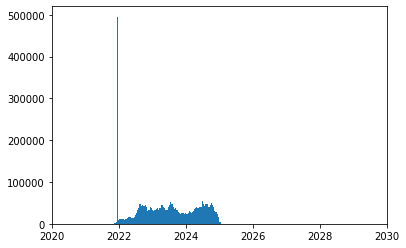

In [6]:
print(min(t), max(t))
f, ax = plt.subplots()
_ = ax.hist(t, bins=1000)
ax.set_xlim(2020, 2030)

### We don't have luminosities in this file, so I will just take the mean from the OpenSN catalog

In [9]:
opensn = pd.read_csv('OpenSNCat.csv')
m = opensn['Mmax'].mean()
log10lum = 0.4*(4.74 - m)
print(log10lum)

9.244817235946531


### Write to a "raw" file

In [10]:
outdf = pd.DataFrame()
outdf['x'] = x
outdf['y'] = y
outdf['z'] = z
outdf['t'] = t
outdf['log10lum'] = np.full(len(x), log10lum)
outdf['tp'] = df['true_target'].values/100.#/max(df['true_target'].values)
outdf['f1'] = np.full(len(x),1)
outdf['f2'] = np.full(len(x),2)
outdf['f3'] = np.full(len(x),3)

In [11]:
outdf.loc[(t > 2023 + 10/12.) & (t < 2023 + 11/12.)].to_csv("PLAsTiCC.raw",sep=' ', index=False, header=False)
outdf.loc[(t > 2023 + 10/12.) & (t < 2023 + 11/12.)].sample(frac=0.01).to_csv("PLAsTiCCSmall.raw",sep=' ', index=False, header=False)

In [1]:
#combine the files
import os
os.system('cat OpenSNCatConverted.raw PLAsTiCC.raw > ../data/SNdata.raw')
os.system('cat OpenSNCatConvertedSmall.raw PLAsTiCCSmall.raw > ../data/SNdataSmall.raw')

0

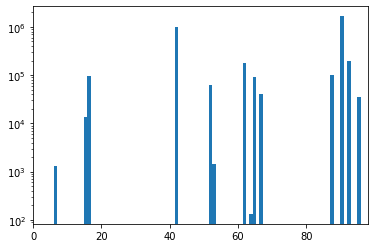

In [12]:
f, ax = plt.subplots()
_ = ax.hist(df['true_target'].values, bins=1000)
ax.set_xlim(0,98)
ax.set_yscale('log')